# Breast Cancer Categorical Dataset

In [1]:
import pandas as pd

In [2]:
filepath  = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv"
datafm = pd.read_csv(filepath
            ,header = None)

In [3]:
datav = datafm.values #extract the values in array

In [4]:
datafm

,0,1,2,3,4,5,6,7,8,9
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'
...,...,...,...,...,...,...,...,...,...,...
281,'50-59','ge40','30-34','6-8','yes','2','left','left_low','no','no-recurrence-events'
282,'50-59','premeno','25-29','3-5','yes','2','left','left_low','yes','no-recurrence-events'
283,'30-39','premeno','30-34','6-8','yes','2','right','right_up','no','no-recurrence-events'
284,'50-59','premeno','15-19','0-2','no','2','right','left_low','no','no-recurrence-events'


In [5]:
# separamos entre las variables de entrada y salida del modelo
X = datav[:, :-1] # todas las variables excepto la columna 9 de la recurrencia
y = datav[:,-1] # la columan 9 sera la salida

In [6]:
# damos formato a los arreglos para que sean de tipo string
X = X.astype(str)


In [7]:
# reacomodamos el segundo arreglo para que sea separe cada entrada como un nuevo arreglo
y = y.reshape((len(y), 1))

Una vez que hemos cargado los datos vamos a usarlos para crear y evaluar el modelo. 
Usaremos la función ```traint_test_split``` con el 67% de los datos para entrenar y 33% para evaluar.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# separamos entre datos para entrenar y datos para el test.
X_train, X_test, y_train, y_test = train_test_split(X, y,# los datos
                                                    test_size=0.33, #el prorcentaje a sividir
                                                    random_state=1 # randomizar los datos
                                                   )

In [10]:
# podemos ver como quedaron los datos
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (191, 9) (191, 1)
Test (95, 9) (95, 1)


 Tenemos 191 ejemplos para entrenar y 95 para la prueba.

Ahora que tenemos los datos vamos a codificarlos en valores numericos. 

In [11]:
from sklearn.preprocessing import OrdinalEncoder

La siguiente función toma como entradas los datos de prueba y de entrenamiento y los transforma usando un codificador ordinario.

In [12]:
# preparamos los datos para poderlos usar en un modelo
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder() # creo un codificador
    oe.fit(X_train) #ajusto el codificador a los datos de entrenamiento 
    X_train_enc = oe.transform(X_train) # codifico los datos, esto ya es una arreglo numerico
    X_test_enc = oe.transform(X_test) #codifico tambien los datos de prueba
    return X_train_enc, X_test_enc

También necesitamos preparar las variables de predicción. Como se trata en este caso de calsificar si el cancer es reincidente o no entonces es una clasificación binari. Mapearemos las dos opciones en valores de cero y uno. Como es una tarea de clasificación ordinaria el módulo de scikit-learn ya tiene implementada una función para codificarlos.

In [13]:
from sklearn import preprocessing

In [20]:
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

Ahora podemos llamar a las funciones para preparar nuestros datos.

In [15]:
# preparamos
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)


In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

/home/evelynalvarez/.julia/conda/3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [27]:
X_train_enc

array([[ 3.,  0.,  4., ...,  0.,  3.,  0.],
       [ 1.,  2.,  9., ...,  0.,  3.,  0.],
       [ 3.,  2., 10., ...,  1.,  2.,  1.],
       ...,
       [ 4.,  0.,  1., ...,  1.,  1.,  0.],
       [ 4.,  0.,  7., ...,  1.,  1.,  0.],
       [ 4.,  0.,  8., ...,  0.,  0.,  0.]])

### Modelo
Podemos ahora definir el modelo, en este caso usaremos una red neuronal MLP (MultiLayer Perceptron) con una capa escondida con 10 nodos y un solo nodo en la salida que hará las clasificaciones binarias.


In [5]:
from keras.models import Sequential
from keras.layers import Dense

In [75]:
# definimos el modelo
model = Sequential() # será un modelo sequencial
# agregamos una capa al modelo de red que sea una capa densa
model.add(Dense(10 #numero de nodos en la capa escondida
                , input_dim=X_train_enc.shape[1] #le decimos la dimensión de los datos de entrada
                , activation='relu' # definimos una función de activación rectificadora
                , kernel_initializer='he_normal')) #iniciamos el kernel con una distribución
# agregamos la capa final de salidaque también queremos que sea densa
model.add(Dense(1, # número de nodos en la capa
                activation='sigmoid')) #función de activación.


### Compilando el modelo 

In [76]:
# compilamos el modelo de keras
model.compile(loss='binary_crossentropy' # función de pérdida
              , optimizer='adam' #optimizador Adam(el mas común)
              , metrics=['accuracy']) #?

### Ajustando el modelo 

In [95]:

# ajustamos el modelo a los datos tratados
model.fit(X_train_enc #los datos codificados de entrenamiento
          , y_train_enc #los datos de respuesta codificados de entrenamiento
          , epochs=100 
          , batch_size=10 
          , verbose=2) 


Epoch 1/100
20/20 - 0s - loss: 0.4182 - accuracy: 0.8272
Epoch 2/100
20/20 - 0s - loss: 0.4233 - accuracy: 0.8063
Epoch 3/100
20/20 - 0s - loss: 0.4173 - accuracy: 0.8168
Epoch 4/100
20/20 - 0s - loss: 0.4190 - accuracy: 0.8115
Epoch 5/100
20/20 - 0s - loss: 0.4189 - accuracy: 0.8220
Epoch 6/100
20/20 - 0s - loss: 0.4196 - accuracy: 0.8115
Epoch 7/100
20/20 - 0s - loss: 0.4173 - accuracy: 0.8010
Epoch 8/100
20/20 - 0s - loss: 0.4165 - accuracy: 0.8168
Epoch 9/100
20/20 - 0s - loss: 0.4177 - accuracy: 0.8115
Epoch 10/100
20/20 - 0s - loss: 0.4171 - accuracy: 0.8115
Epoch 11/100
20/20 - 0s - loss: 0.4186 - accuracy: 0.8115
Epoch 12/100
20/20 - 0s - loss: 0.4161 - accuracy: 0.8115
Epoch 13/100
20/20 - 0s - loss: 0.4170 - accuracy: 0.8115
Epoch 14/100
20/20 - 0s - loss: 0.4150 - accuracy: 0.8168
Epoch 15/100
20/20 - 0s - loss: 0.4203 - accuracy: 0.8168
Epoch 16/100
20/20 - 0s - loss: 0.4183 - accuracy: 0.8063
Epoch 17/100
20/20 - 0s - loss: 0.4158 - accuracy: 0.8115
Epoch 18/100
20/20 - 0s

### Evaluando el modelo

In [96]:
# evaluamos el modelo
_, accuracy = model.evaluate(X_test_enc #los datos para la prueba
                             , y_test_enc # datos objetivo para la prueba 
                             , verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 71.58


Note: Your results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.

In this case, we can see that the model achieved an accuracy of about 70% on the test dataset.

Not bad, given that an ordinal relationship only exists for some of the input variables, and for those where it does, it was not honored in the encoding.

# How to One Hot Encode Categorical Data

El codificador One Hot es usado para datos que no tienen relación entre sus categorías. 
El método trata de representar cada variable como un vector de ceos y unos, el cual tiene un uno en la categoría que represente la caracterítica. Así cada variable en los datos se va a reemplazar por un vector. 
La librería de scikit ya tiene un método para codificar los datos llamado OneHotEnconder.

In [1]:
# prepare input data

def prepare_inputs(X_train, X_test):
    ohe = OneHotEncoder() # creamos el codificador
    ohe.fit(X_train) # lo ajustamos a los datos de entrenamiento
    X_train_enc = ohe.transform(X_train) #transformamos los datos de entrenamiento
    X_test_enc = ohe.transform(X_test) # transformamos los datos de prueba
    return X_train_enc, X_test_enc # los regresamos para que podamos usarlos en el modelo.

In [3]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense

In [3]:
# example of one hot encoding for a neural network


# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = read_csv(filename, header=None)
    # retrieve numpy array
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, :-1]
    y = dataset[:,-1]
    # format all fields as string
    X = X.astype(str)
    # reshape target to be a 2d array
    y = y.reshape((len(y), 1))
    return X, y

In [4]:
# prepare input data
# despues de haber separado los datos lo que sigue es 
def prepare_inputs(X_train, X_test):
    ohe = OneHotEncoder() #creamos el codificador
    ohe.fit(X_train) #entrenamos el codififcador
    X_train_enc = ohe.transform(X_train) # transformamos los datos de entrenamiento
    X_test_enc = ohe.transform(X_test) #Transformamos los datos de prueba
    return X_train_enc, X_test_enc

In [5]:
# prepare target
# una vez que los datos estan codificados los vamos a codificar los datos de salida
def prepare_targets(y_train, y_test):
    le = LabelEncoder() #usamos ahora un label encoder que asigna a cada carcater un entero
    le.fit(y_train) #ajustamos los datos, veamos que en este caso no es necesario entrenar el codificador
    y_train_enc = le.transform(y_train) #transformamos los datos
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc


In [4]:
# load the dataset
X, y = load_dataset('breast-cancer.csv')

NameError: name 'load_dataset' is not defined

In [12]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [14]:
# prepare input data
#codificando los datos en entrada
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

In [15]:
# prepare output data
#codificando los datos de salida
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

/home/evelynalvarez/.julia/conda/3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [16]:
# define the  model
model = Sequential() #modelo sequencial
# agregamos una capa densa
model.add(Dense(10 # nodos
                , input_dim=X_train_enc.shape[1] #de dimensión igual a la de los datos de entrenamiento de entrada
                , activation='relu' #usando una función activadora  rectificadora lineal
                , kernel_initializer='he_normal')) 
# agregamos una capa densa que será la de salida
model.add(Dense(1, #1 solo nodo
                activation='sigmoid'))

In [17]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
# fit the keras model on the dataset
model.fit(X_train_enc, y_train_enc, epochs=130, batch_size=10, verbose=2)


Epoch 1/130
20/20 - 0s - loss: 0.3500 - accuracy: 0.8691
Epoch 2/130
20/20 - 0s - loss: 0.3477 - accuracy: 0.8691
Epoch 3/130
20/20 - 0s - loss: 0.3457 - accuracy: 0.8691
Epoch 4/130
20/20 - 0s - loss: 0.3446 - accuracy: 0.8639
Epoch 5/130
20/20 - 0s - loss: 0.3426 - accuracy: 0.8639
Epoch 6/130
20/20 - 0s - loss: 0.3403 - accuracy: 0.8796
Epoch 7/130
20/20 - 0s - loss: 0.3384 - accuracy: 0.8743
Epoch 8/130
20/20 - 0s - loss: 0.3371 - accuracy: 0.8743
Epoch 9/130
20/20 - 0s - loss: 0.3354 - accuracy: 0.8796
Epoch 10/130
20/20 - 0s - loss: 0.3337 - accuracy: 0.8743
Epoch 11/130
20/20 - 0s - loss: 0.3323 - accuracy: 0.8796
Epoch 12/130
20/20 - 0s - loss: 0.3324 - accuracy: 0.8691
Epoch 13/130
20/20 - 0s - loss: 0.3313 - accuracy: 0.8743
Epoch 14/130
20/20 - 0s - loss: 0.3266 - accuracy: 0.8796
Epoch 15/130
20/20 - 0s - loss: 0.3253 - accuracy: 0.8796
Epoch 16/130
20/20 - 0s - loss: 0.3232 - accuracy: 0.8743
Epoch 17/130
20/20 - 0s - loss: 0.3216 - accuracy: 0.8796
Epoch 18/130
20/20 - 0s

In [21]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test_enc, y_test_enc, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 70.53


# How to Use a Learned Embedding for Categorical Data

First, we can enumerate each variable and construct an input layer and connect it to an embedding layer, and store both layers in lists. We need a reference to all of the input layers when defining the model, and we need a reference to each embedding layer to concentrate them with a merge layer.

In [1]:
# example of learned embedding encoding for a neural network
from numpy import unique
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers.merge import concatenate
from keras.utils import plot_model

In [2]:
# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = read_csv(filename, header=None)
    # retrieve numpy array
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, :-1]
    y = dataset[:,-1]
    # format all fields as string
    X = X.astype(str)
    # reshape target to be a 2d array
    y = y.reshape((len(y), 1))
    return X, y

In [3]:
# prepare input data
def prepare_inputs(X_train, X_test):
    X_train_enc, X_test_enc = list(), list()
    # label encode each column
    for i in range(X_train.shape[1]):
        le = LabelEncoder() # creamos el codificador
        le.fit(X_train[:, i]) # ajustamos el modelo pero por cada columna
        # encode
        train_enc = le.transform(X_train[:, i])
        test_enc = le.transform(X_test[:, i])
        # store
        X_train_enc.append(train_enc)
        X_test_enc.append(test_enc)
    return X_train_enc, X_test_enc

In [4]:
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder() #Creamos un codificador
    le.fit(y_train) # ajustamos el codificador
    y_train_enc = le.transform(y_train) # transformamos los datos
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [5]:
# load the dataset
X, y = load_dataset('breast-cancer.csv')

In [6]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [7]:
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

In [18]:
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

NameError: name 'y_train_enc' is not defined

In [9]:
y_test_enc

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0])

In [10]:
# make output 3d
y_train_enc = y_train_enc.reshape((len(y_train_enc), 1, 1)) #les cambiamos la forma para que sea arreglo
# en la que cada entrada es un dato del arreglo.
y_test_enc = y_test_enc.reshape((len(y_test_enc), 1, 1)) 

In [11]:
y_test_enc

array([[[1]],

       [[0]],

       [[0]],

       [[1]],

       [[1]],

       [[1]],

       [[1]],

       [[0]],

       [[0]],

       [[1]],

       [[0]],

       [[1]],

       [[0]],

       [[1]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[1]],

       [[0]],

       [[0]],

       [[1]],

       [[1]],

       [[0]],

       [[1]],

       [[1]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[1]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[1]],

       [[1]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[1]],

       [[0]],

       [[1]],

       [[0]],

       [[0]],

       [[0]],

       [[1]],

       [[0]],

       [[0]],

       [[1]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[1]],

       [[0]],

       [[0]],

       [[1]],

       [[1]],

       [[0

In [12]:
# prepare each input head
in_layers = list()
em_layers = list()
for i in range(len(X_train_enc)):
    # calculate the number of unique inputs
    n_labels = len(unique(X_train_enc[i]))
    # define input layer
    in_layer = Input(shape=(1,))
    # define embedding layer
    em_layer = Embedding(n_labels, 10)(in_layer)
    # store layers
    in_layers.append(in_layer)
    em_layers.append(em_layer)

In [13]:
# concat all embeddings
merge = concatenate(em_layers)
dense = Dense(10, activation='relu', kernel_initializer='he_normal')(merge)
output = Dense(1, activation='sigmoid')(dense)


In [14]:
# creating the model
model = Model(inputs=in_layers, outputs=output)

In [15]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
import pydot
import graphviz
from keras.utils import plot_model

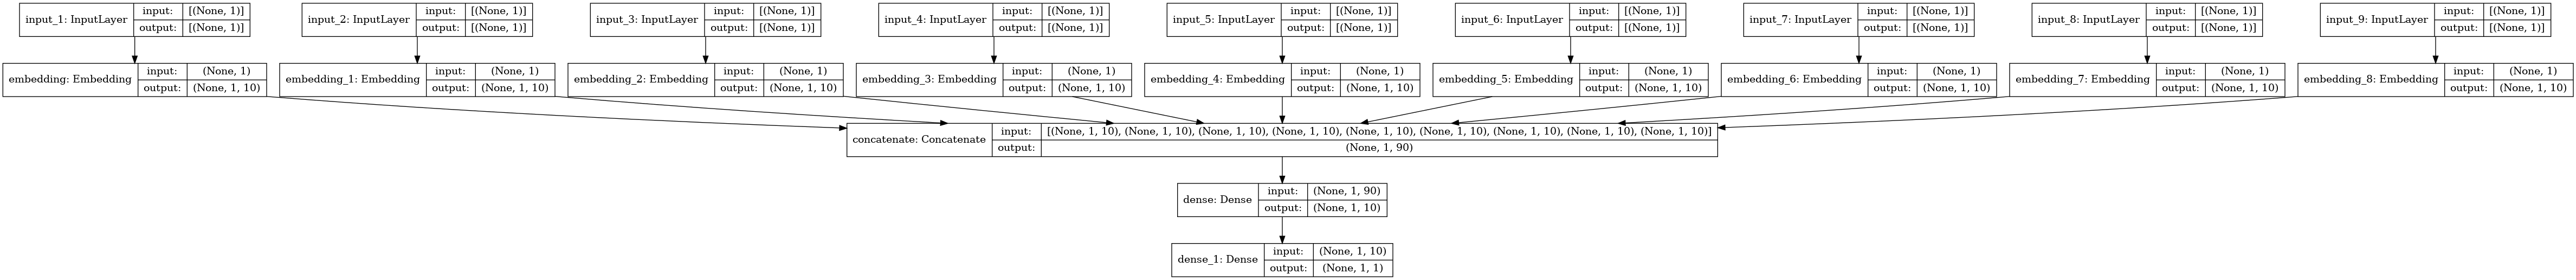

In [27]:
# plot graph
plot_model(model, show_shapes=True, to_file='embeddings.png')

In [19]:
# fit the keras model on the dataset
model.fit(X_train_enc, y_train_enc, epochs=20, batch_size=16, verbose=2)
# evaluate the keras model
_, accuracy = model.evaluate(X_test_enc, y_test_enc, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/20
12/12 - 2s - loss: 0.6869 - accuracy: 0.6021
Epoch 2/20
12/12 - 0s - loss: 0.6661 - accuracy: 0.7277
Epoch 3/20
12/12 - 0s - loss: 0.6447 - accuracy: 0.7277
Epoch 4/20
12/12 - 0s - loss: 0.6219 - accuracy: 0.7277
Epoch 5/20
12/12 - 0s - loss: 0.6005 - accuracy: 0.7277
Epoch 6/20
12/12 - 0s - loss: 0.5794 - accuracy: 0.7277
Epoch 7/20
12/12 - 0s - loss: 0.5643 - accuracy: 0.7277
Epoch 8/20
12/12 - 0s - loss: 0.5509 - accuracy: 0.7277
Epoch 9/20
12/12 - 0s - loss: 0.5417 - accuracy: 0.7277
Epoch 10/20
12/12 - 0s - loss: 0.5323 - accuracy: 0.7330
Epoch 11/20
12/12 - 0s - loss: 0.5242 - accuracy: 0.7539
Epoch 12/20
12/12 - 0s - loss: 0.5160 - accuracy: 0.7696
Epoch 13/20
12/12 - 0s - loss: 0.5083 - accuracy: 0.7696
Epoch 14/20
12/12 - 0s - loss: 0.5021 - accuracy: 0.7696
Epoch 15/20
12/12 - 0s - loss: 0.4959 - accuracy: 0.7749
Epoch 16/20
12/12 - 0s - loss: 0.4903 - accuracy: 0.7749
Epoch 17/20
12/12 - 0s - loss: 0.4857 - accuracy: 0.7749
Epoch 18/20
12/12 - 0s - loss: 0.4802 - 

https://machinelearningmastery.com/how-to-prepare-categorical-data-for-deep-learning-in-python/

https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/